# Household crime Data
---------

* Information of household crimes reported.

In [1]:
#Import your packages
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("household.csv")
print( str(len(data)) + " Rows.")
print( str(len(data.columns)) + " columns")

21095 Rows.
675 columns


## 21095 rows & 675 Columns
-------------

#### From our _info()_ function we found out that our finding consist of 675 columns and we found out that we have 21095 rows these are the stats for the  whole of south Africa which basically means we got **21095 responses**,  since wer are interested in the findings in Gauteng we will segregate it from the rest of the country
-------

# ___*Divide and conquer*___
------

* Before trying to represent our data visually we'll try to pick out our desired province which is gauteng(7)

In [2]:
gauteng = data[data.prov == 7]
len(gauteng)

5243

## Gauteng: 5243 rows & 675 Columns
-------
#### Of all the 21095 respondents in South Africa 5243 responses are from the Gauteng region.

# __Now we visually represent.__
-----------------------------------------

* __Now we can **Visually represent** our Gauteng crime stats, finaly!__ 

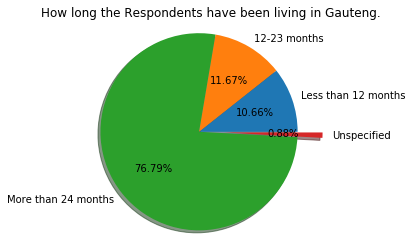

In [4]:
dur = gauteng[['Q21bHowLong']]

l12 = dur[dur.Q21bHowLong == 1]
lessthan12 = l12.count().reset_index(name="frq")
l12 = lessthan12['frq'] # Less than 12 months data/number

m12 = dur[dur.Q21bHowLong == 2]
morethan12 = m12.count().reset_index(name="frq")
months12 = morethan12['frq'] # 12 to 23 months data/number

years = dur[dur.Q21bHowLong ==3]
months24 = years.count().reset_index(name='frq')
more24 = months24['frq'] #more than 24 months data/number

unspecified = dur[dur.Q21bHowLong == 9]
unknown = unspecified.count().reset_index(name='frq')
none = unknown['frq'] #unspecified months data/number

#Time to plot our data!!!
counts = [l12, months12, more24, none]
labels = ['Less than 12 months', '12-23 months','More than 24 months','Unspecified']
explode =[0,0,0,0.2]
plt.pie(counts, labels=labels,startangle=0, autopct='%.2f%%', radius=0.79, shadow ='False',explode=explode )
plt.title('How long the Respondents have been living in Gauteng.')
plt.axis('equal')
plt.show()

## Don't waste energy - Check out the metro codes.
---------------
#### Since in Gauteng we have 675 columns it's going to be useless to visually represent every single column, so we're going to plot by Metro-codes.
----------------

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("household.csv")
nonmetro = data[data.metro_code == 12]
Ekurhuleni = data[data.metro_code == 13]
CBD = data[data.metro_code == 14]
Tshwane = data[data.metro_code == 15]
#to find out how many entries each metro has we'll use the **info()** function
print('CBD : '+str(len(CBD)))
print('None-metro: '+str(len(nonmetro)))
print('Tshwane : '+str(len(Tshwane)))
print('Ekurhuleni : '+str(len(Ekurhuleni)))

sum = len(nonmetro)+len(Ekurhuleni)+len(CBD)+len(Tshwane)
print('Sum = Gauteng : '+str(sum))

CBD : 1847
None-metro: 867
Tshwane : 1140
Ekurhuleni : 1389
Sum = Gauteng : 5243


---------------------
## Our data correlates with the provided info.
--------------------- 
 So according to our  **_info()_** our data consists of **_1140_** entries from **City of Tshwane**, **_1847_** entries from **The city of Johannesburg**, **_1389_** entries from **Ekurhuleni** and _**867**_ entries from the **Non-metro**.

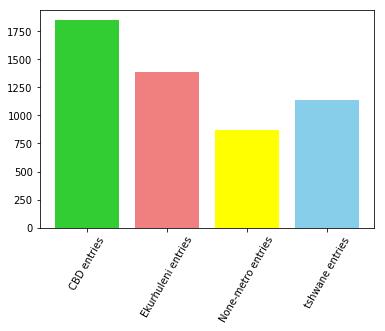

In [6]:
tshwanefrq = Tshwane['metro_code'].count()
ekurhulenifrq=Ekurhuleni['metro_code'].count()
nonfrq=nonmetro['metro_code'].count()
cbdfrq=CBD['metro_code'].count()
#counts gathered time to group them.
counts = [cbdfrq,nonfrq,ekurhulenifrq,tshwanefrq]
#counts grouped time for labels.
labels = ['CBD entries','None-metro entries','Ekurhuleni entries','tshwane entries']
colors = ['limegreen','yellow','lightcoral','skyblue']
#plotting time
plt.bar(labels, counts, color=colors)
plt.xticks(rotation=60)
plt.show()

So of all the Gauteng data **16,54%** is _None-metro_, **26.49%** is _Ekurhuleni_, **21,74** is _Tshwane_ and **35,23** is _The city of johannesburg_. 

# General thinking about Crime.
------------------


### Topic
--------
* **Question** :  Has the topic of crime come up in any conversation you had with your family, friends or colleagues in the past two weeks?

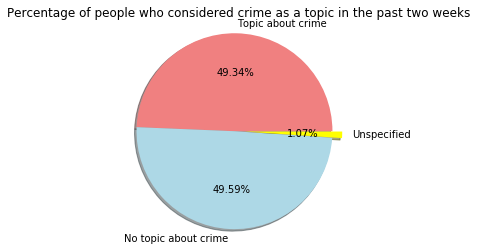

In [8]:
topic = gauteng[['Q21topiccrime']]
# desired column set now let's boogey
t1yes = topic[topic.Q21topiccrime == 1]
yesfirst = t1yes.count().reset_index(name="yesfrq")
yes = yesfirst["yesfrq"]

t1no = topic[topic.Q21topiccrime == 2]
nofirst = t1no.count().reset_index(name="nofrq")
no = nofirst["nofrq"]

t1non = topic[topic.Q21topiccrime == 9]
nonfirst = t1non.count().reset_index(name="nonfrq")
none = nonfirst["nonfrq"]

#Everything is fine time to plot, yey!!!
colors = ['lightcoral','lightblue','yellow']
labels = ['Topic about crime','No topic about crime','Unspecified']
explode = (0,0,0.1)
plt.title("Percentage of people who considered crime as a topic in the past two weeks")
count = [yes, no, none]
plt.pie(count, colors=colors,labels=labels , explode=explode, shadow="True",autopct='%.2f%%')

plt.axis('equal')
plt.show()

#### Now we have seen that 1,07 % of the respondents don't know if they heard/talked about crime, 49.34 talked about crime and 49.59 didn't talk about crime.
----------

## Crime that occurs the most.
----------
#### actual Question:
------------
* Which crimes occur mostly in your area?

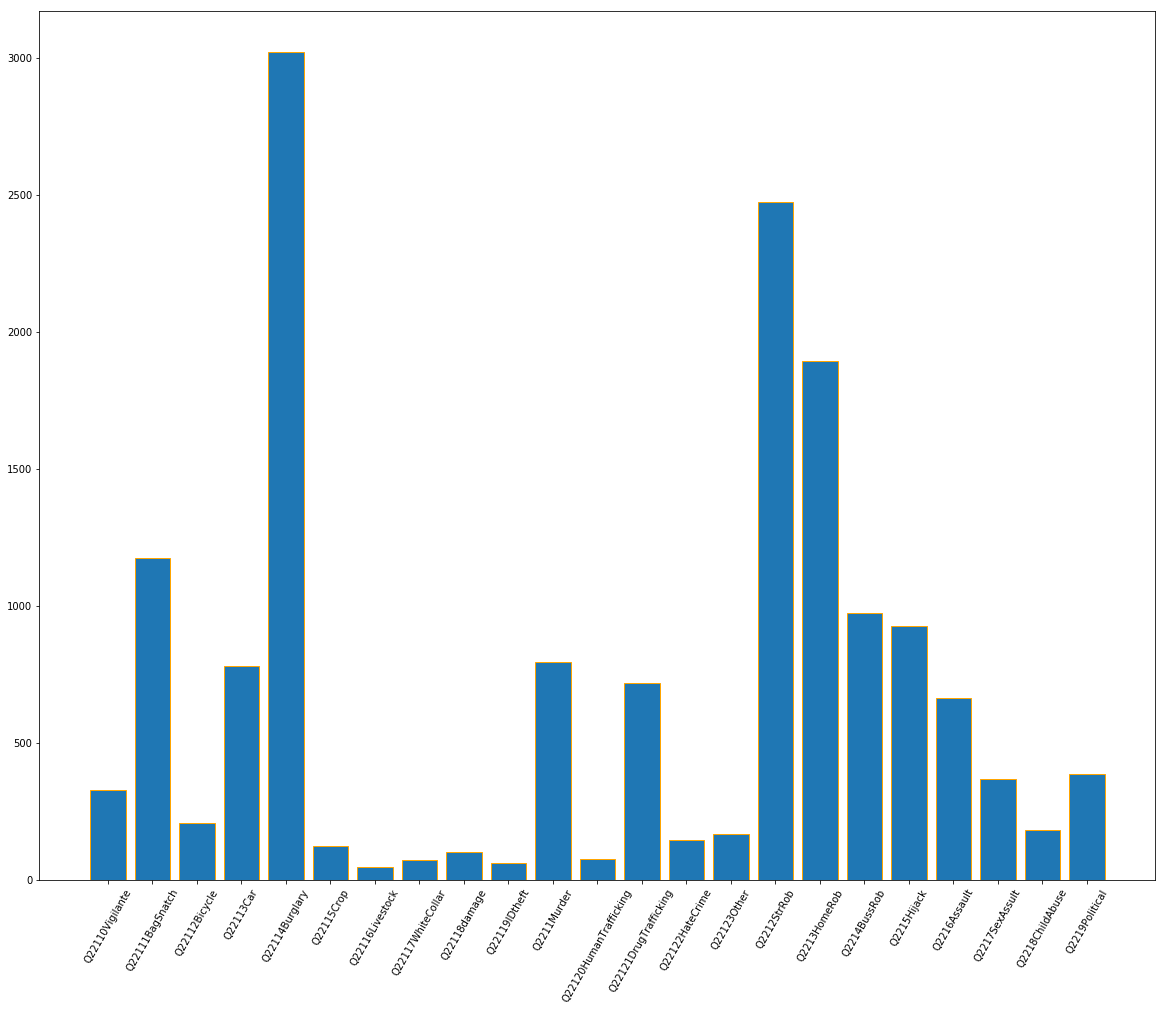

In [9]:
topic_codes = ['Q2211Murder','Q2212StrRob','Q2213HomeRob','Q2214BussRob','Q2215Hijack','Q2216Assault','Q2217SexAssult',
               'Q2218ChildAbuse','Q2219Political','Q22110Vigilante','Q22111BagSnatch','Q22112Bicycle','Q22113Car',
               'Q22114Burglary','Q22115Crop','Q22116Livestock','Q22117WhiteCollar','Q22118damage','Q22119IDtheft',
               'Q22120HumanTrafficking','Q22121DrugTrafficking','Q22122HateCrime','Q22123Other']
# Now it's ime to figure out the function.
def countCrimes(topics):
    crime_counts = []
    for topic in topics:
        count = pd.value_counts(gauteng[topic].values)[1]
        crime_counts.append(count)
    
    return crime_counts

#Now our data is set and counted time to plot it.
#because our program keeps on repeating colors
counts = countCrimes(topic_codes)
labels = topic_codes
width = 1/1.5
bar_width = 0.2
plt.rcParams['figure.figsize'] = (20,16)
barlist = plt.bar(labels, counts, edgecolor='orange')
plt.xticks(rotation=60)
plt.show()

In [10]:
#to create appropriate labels for our data from our topic codes we'll slice our existing topic codes.
def newLabels(topics):
    crime_names = []
    for topic in topics:
        name = topic[5:]
        crime_names.append(name)
    
    return crime_names
labels = newLabels(topic_codes)
#in our labels some of the topics were not sliced correctly so we'll segregate them and slice the unsliced properly!!!
slicedLabels = labels[0:9]
errorLabels = labels[9:]
def labelCor(topics):
    corrected = []
    for topic in topics:
        name = topic[1:]
        corrected.append(name)
    return corrected
corlabels = labelCor(errorLabels)
#Now everything is corrected we have to join the two correct lists now.
labels = slicedLabels+corlabels
print(labels)
len(labels)
#Everything is now ok, our list is in order and the length is this the same.

['Murder', 'StrRob', 'HomeRob', 'BussRob', 'Hijack', 'Assault', 'SexAssult', 'ChildAbuse', 'Political', 'Vigilante', 'BagSnatch', 'Bicycle', 'Car', 'Burglary', 'Crop', 'Livestock', 'WhiteCollar', 'damage', 'IDtheft', 'HumanTrafficking', 'DrugTrafficking', 'HateCrime', 'Other']


23

## The above plotted data is not sorted.
---------------

#### To sort out our data from highest to lowest we'll have to create a dataframe then we'll sort and plot.


In [12]:
#to create a dataframe we have to create dictionaries with our lists
sortdata = {'crimes': labels, 'frequency':counts}
#so sortdata is our dictionary for our 'crimes' and our 'freq'.

# now we want to visually present our dictionary in a dataframe.
dictdata = pd.DataFrame(sortdata) #pandas is case sensitive for "DataFrame"!!!
sortdataframe = dictdata.sort_values('frequency', ascending=False)
labels = sortdataframe['crimes']
counts = sortdataframe['frequency']


### Here is our soted dataframe.

In [13]:
sortdataframe

,crimes,frequency
13,Burglary,3022
1,StrRob,2475
2,HomeRob,1893
10,BagSnatch,1176
3,BussRob,977
4,Hijack,927
0,Murder,796
12,Car,781
20,DrugTrafficking,720
5,Assault,666


#### Now that we sorted out our data we can plot our graph.

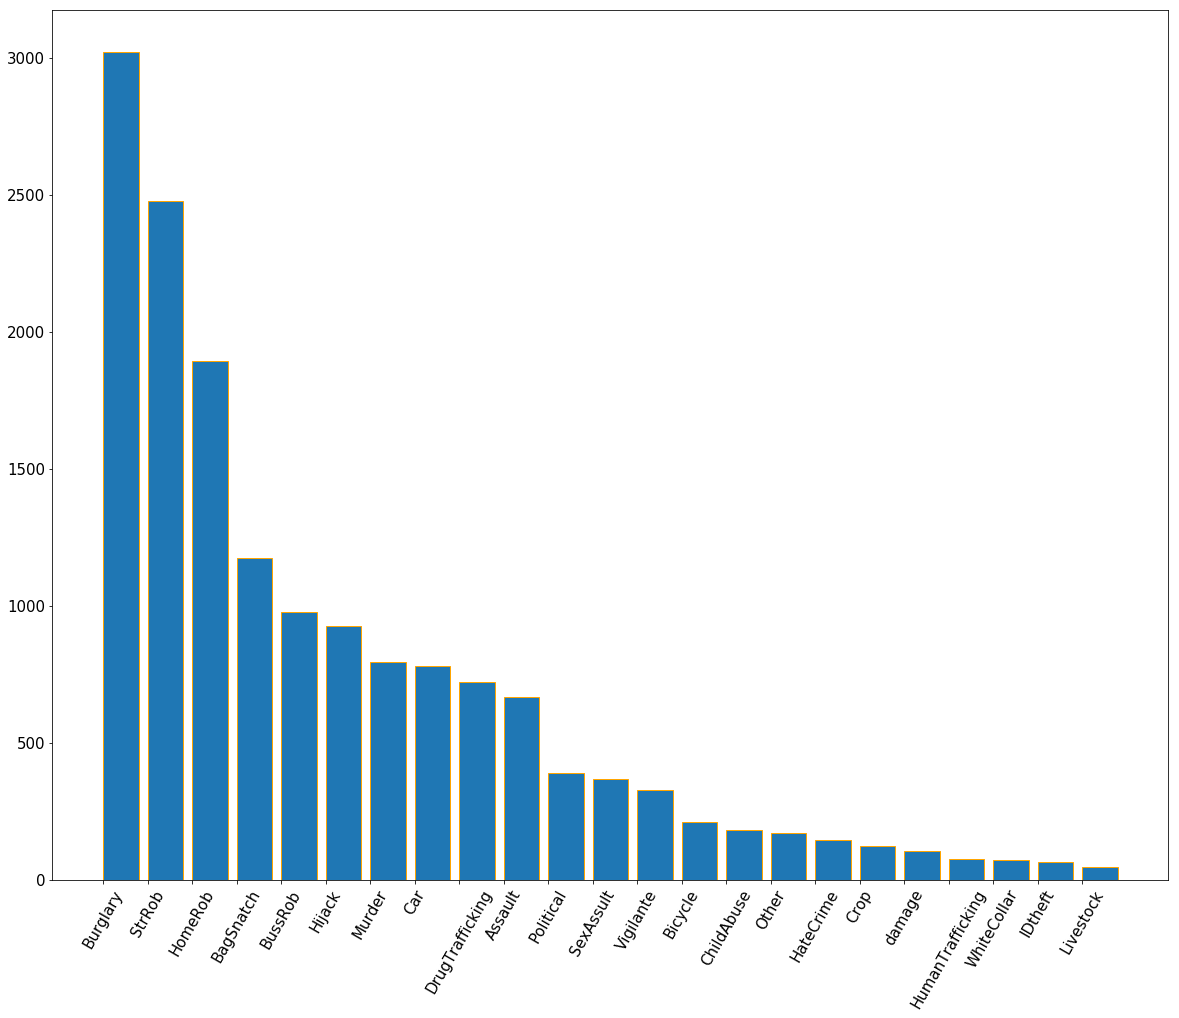

In [18]:
plt.bar(range(len(labels)), list(map(float,counts)),edgecolor='orange', align='edge')
plt.xticks(range(len(labels)), labels,rotation=60, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [19]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    a MATLAB-like way of plotting.
    
    pyplot is mainly intended for interactive plots and simple cases of programmatic
    plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The object-oriented API is recommended for more complex plots.

FUNCTIONS
    acorr(x, hold=None, data=None, **kwargs)
        Plot the autocorrelation of `x`.
        
        Parameters
        ----------
        
        x : sequence of scalar
        
        hold : boolean, optional, *deprecated*, default: True
        
        detrend : callable, optional, default: `mlab.detrend_none`
            x is detrended by the `detrend` callable. Default is no
            normalization.
        
        normed : boolean